In [9]:
import pandas as pd

# Load a CSV file
data = pd.read_csv('C:/Users/HP/OneDrive/Desktop/ai/kaim-week-00/data/benin-malanville.csv')





In [20]:
# Preview the data 
print(data.head())



          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [21]:
# check the data information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [22]:
#data description by different statstics
print(data.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [19]:
data.shape

print(data.isnull().sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [23]:
# Check for missing values in the dataset
missing_values = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum()

print("Missing Values in Key Columns:")
print(missing_values)



Missing Values in Key Columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [24]:
# Check for negative values where only positive should exist
negative_values = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0

# Count negative values per column
negative_counts = negative_values.sum()

print("Negative Values in Key Columns:")
print(negative_counts)



Negative Values in Key Columns:
GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [27]:
# Replace negative values with NaN using DataFrame.apply
data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(
    lambda col: col.where(col >= 0)
)


In [28]:
# Check if there are any negative values left
print((data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum())

# Check for missing values
print(data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum())


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [30]:
from scipy.stats import zscore

# Calculate Z-scores for the specified columns
z_scores = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].apply(zscore)

# Identify outliers
outliers = (z_scores.abs() > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()}")


Number of outliers detected: 4002


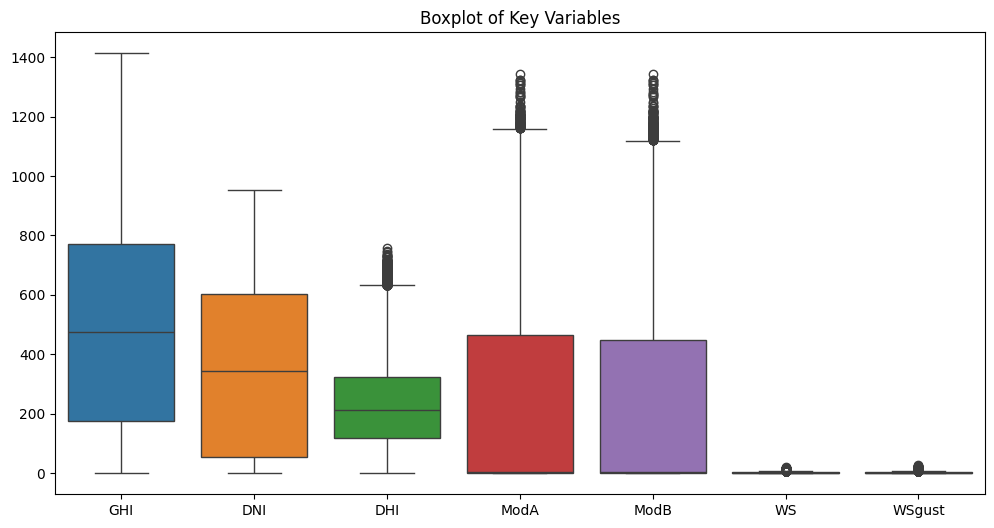

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])
plt.title('Boxplot of Key Variables')
plt.show()


In [33]:
# Drop rows identified as outliers
data = data[~outliers]


In [34]:
# Check if all issues have been resolved
print("Updated Data Quality Check:")
print(data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].isnull().sum())
print("Any remaining negative values:", (data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum())


Updated Data Quality Check:
GHI       256963
DNI       274469
DHI       257300
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64
Any remaining negative values: GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
